# Final Project Report

* Class: DS 5100
* Student Name:Zahra Nouri 
* Student Net ID:vkx7ss
* This URL: https://github.com/ZahraaNouri/MonteCarloSimulation/blob/main/scr/DS51200_FinalProject_Zahra_Nouri.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:[https://github.com/ZahraaNouri/MonteCarloSimulation](https://github.com/ZahraaNouri/MonteCarloSimulation)

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

#Die Class

import pandas as pd
import numpy as np

class Die():
    """
    A class representing a die with customizable faces and weights.

    A Die object allows rolling to generate random outcomes, adjusting the
    probability of each face via weights, and querying the current state of
    the die.

    Attributes:
    faces (np.ndarray): An array of unique symbols or numbers representing the die faces.
    w (list): A list of weights associated with each face. Defaults to 1.0 for all faces.
    __die_df (pd.Series): A private pandas Series holding faces and their weights.
    """

    
    def __init__(self, faces=[1, 2, 3, 4, 5, 6]):
          
        """
        Initializes a die with the given faces and assigns equal weights to each face, checks the faces to be 
        numpay array, checks the faces to avoid similar faces, and creates a dataframe of faces and weights (by default 1)

        Inputs:
            faces (np.ndarray): A NumPy array of unique symbols or numbers representing the die faces. Default value is 1 to 6 (standard dice)

        Raises:
            TypeError: If faces is not a NumPy array.
            ValueError: If faces are not unique or contain invalid data types (must be numeric or strings).

        Attributes:
            __die_df (pd.Series): A private pandas Series with faces as the index and weights as values.
        """
        
        self.faces = faces

        # Check if faces is a numpy array
        if not isinstance(self.faces, np.ndarray):
            raise TypeError("Faces must be a NumPy array!")

        # Check for uniqueness of the faces
        if len(np.unique(self.faces)) != len(self.faces):
            raise ValueError("Faces are not Unique.")

        # Check for face type (only numbers and strings)
        arr_type = self.faces.dtype
        if not (np.issubdtype(arr_type, np.str_) or np.issubdtype(arr_type, np.number)):
            raise ValueError("Please Enter Number or String as Die Faces.")

        # Creating weight index series
        self.w = [1 for _ in range(len(self.faces))]

        # Save data_frame
        self.__die_df = pd.Series(self.w, index=self.faces)
    

    def change_weight(self, face, new_weight):
        """
        Changes the weight of a specified face of the die.

        Inputs:
            face (str or int): The face whose weight is to be changed.
            new_weight (float): The new weight for the specified face. Must be positive and castable to a number.

        Raises:
            IndexError: If the specified face is not valid.
            TypeError: If the new weight is not numeric or cannot be cast to a float.
        """
        
        # Check if the face is in the faces list
        if face in self.faces:
            #check if the weight is valid (positive number)
            if not isinstance(new_weight, (int, float)): 
                try:
                    new_weight=float(new_weight)
                except(ValueError, TypeError):
                    raise TypeError("Weight must be a number or castable to a number.")


            #check if the weight is positive 
            if new_weight < 0:
                raise ValueError("Weight must be positive")
                
            # Change the corresponding weight in the Series
            self.__die_df[face] = new_weight
            print(f"Weight of {face} changed to {new_weight}")
            
        else:
            raise IndexError("Face not found among the die faces")
            
                
    def roll_time(self, times=1):
        """
        Rolls the die a specified number of times and saves the result in a dataframe

        Inputs:
            times (int): The number of times to roll the die. Defaults to 1.

        Returns:
           samples(list): A list of outcomes corresponding to the rolls.

        Raises:
            ValueError: If 'times' is not a positive integer.
        """
        
        
        if not isinstance(times, int) or times <= 0:
            raise ValueError("The 'times' parameter must be a positive integer.")
        
        samples=self.__die_df.sample(n=times, replace=True, weights=self.__die_df.values).index.tolist()
        return samples

    def current_state(self):
        """
        Retrieves the current state of the die, including its faces and weights.

        Returns:
            die_df(pd.Series): A pandas Series with faces as the index and their respective weights as values.

        """
        #Provide a copy of the private data frame.
        die_df = self.__die_df.copy()
        return die_df

    def get_faces(self):
        """
        Retrieves the face values of the die.

        Returns:
            self.faces(np.ndarray): The faces of the die as a NumPy array.

        """
        return self.faces



#--------------------------------------------------------------------------------------


#Game Class 

import pandas as pd
import numpy as np

class Game():

    """
    A class representing a game consisting of rolling one or more dice multiple times.

    A Game object accepts a list of similar Die objects, rolls them for a specified
    number of times, and records the results. Results can be retrieved in wide or narrow formats.

    Attributes:
        __dice_list (list): A private list of Die objects used in the game.
        __play_df (pd.DataFrame): A private DataFrame holding the results of the most recent play.
    """

    
    def __init__(self, dice_list):
        """
        Initializes a game with a list of similar Die objects.

        Inputs:
            dice_list (list): A list of Die objects to be used in the game.

        Raises:
            TypeError: If dice_list is not a list or does not contain Die objects.
            ValueError: If the dice in the list do not have the same faces.
        """

        #Validate that the input is a list 
        if not isinstance(dice_list, list):
            raise TypeError("dice_list must be a list of Die objects.")
        
        #check that all dices have the same faces 
        faces_list = [set(die.get_faces()) for die in dice_list]
        if not all (faces == faces_list[0] for faces in faces_list):
            raise ValueError("All dice in the game must have the same faces")
        
        self.__dice_list = dice_list
        self.__play_df = pd.DataFrame()


    def play(self, times):

        """
        Rolls all dice in the game a specified number of times and records the outcomes.

        Inputs:
            times (int): The number of times to roll the dice.

        Raises:
            ValueError: If 'times' is not a positive integer.

        Changes:
            Updates the private attribute __play_df with the results of the rolls.
        """
        
        if not isinstance(times, int) or times <= 0:
            raise ValueError("The 'times' parameter must be a positive integer.")
        self.times = times
      
        # Reset the play data frame for a new game
        self.__play_df = pd.DataFrame()

        for i, dice in enumerate(self.__dice_list):
            roll_result = dice.roll_time(times)
            self.__play_df[i] = roll_result  # Use zero-based indexing for columns

        self.__play_df.index = range(1, times + 1)
        self.__play_df.columns = range(1, len(self.__dice_list)+1)

    def show_results(self, wide=1):

        """
        Returns the results of the most recent game in wide or narrow format.

        Input:
            wide (int): Format option for results. 1 for wide format (default) and 0 for narrow format.

        Returns:
            self.__play_df.copy(pd.DataFrame): A DataFrame of the results in the selected format.

        Raises:
            ValueError: If the 'wide' parameter is not 0 or 1.
        """

        if not (wide == 0 or wide == 1):
            raise ValueError("Wrong Entry for show results. Enter 1 for wide and 0 for narrow dataframe format")
        
        if wide == 0:
            narrow_df = self.__play_df.stack().reset_index()
            narrow_df.columns = ['Roll Number', 'Die Number', 'Outcome']
            narrow_df.set_index(['Roll Number', 'Die Number'], inplace=True)
            return narrow_df
        else:
            return self.__play_df.copy()
    
    def get_dice_faces(self):
        """
        Retrieves the face values of the dice used in the game.

        Returns:
            self.dice_faces(np.ndarray): An array of face values shared by all dice in the game.
        """
        self.dice_faces = self.__dice_list[0].get_faces()
        return(self.dice_faces)

    def get_event_number(self):
        """
        Retrieves the number of rolls (events) in the most recent game.

        Returns:
            self.times(int): The number of rolls played in the game.
        """
        return self.times



#-----------------------------------------------------------------------------------

#Analyzer Class

import pandas as pd
import numpy as np

class Analyzer():
    """
    A class to analyze the statistical properties of the outcomes from a single game.

    An Analyzer object computes metrics such as jackpots, face counts, distinct
    combinations, and permutations from the results of a game.

    Attributes:
        results (pd.DataFrame): The outcomes of the most recent game in wide format.
    """

    def __init__(self, game):
        """
        Initializes the Analyzer with a Game object and checks if the game is an object of Game

        Inputs:
            game (Game): A Game object containing the results to analyze.

        Raises:
            ValueError: If the input is not a Game object.
        """
        if not isinstance(game,Game):
            raise ValueError("Please Enter a Game Object")

        #  Acess the game's results in wide format
        self.results=game.show_results(1)

        self.faces=game.get_dice_faces()
        self.event_number = game.get_event_number()
      
    
    def jackpot(self):

        """
        Counts the number of jackpots in the game results.

        A jackpot is defined as all dice showing the same face in a roll.

        Returns:
            self.jackpot(int): The number of jackpots.
        """
        
        self.jackpot=pd.DataFrame()
        self.jackpot = self.results.nunique(axis = 1) == 1
    
      
        return(sum(self.jackpot))
        

    def face_count(self):
        """
        Computes the count of each face for every roll in the game.

        This method calculates how many times each face appears in each roll
        and organizes the results into a DataFrame.

        Returns:
        self.face_counter(pd.DataFrame): A DataFrame where:
                - Rows represent roll numbers.
                - Columns represent the face values of the dice.
                - Cell values are the counts of each face in a roll.
        """

        
        
        #create a df containing die faces 
        self.face_counter = pd.DataFrame(index= range(1, self.event_number+1), columns = self.faces)

        #Counting the number of faces showed up in each event 
        for face, event in self.results.iterrows():
            counts=event.value_counts()
            self.face_counter.loc[face] = [counts.get(col, 0) for col in self.faces]
        

        return self.face_counter

    def combo_count(self):

        """
        Computes distinct combinations of faces rolled and their counts.

        Combinations are order-independent and may include repetitions.

        Returns:
            combo_counts(pd.DataFrame): A DataFrame with combinations as the index and their counts in a column named 'Count'.
        """

        #convert each row to a sorted tuple -- order not matter 
        combos=self.results.apply(lambda x: tuple(sorted(x)), axis=1)
        
        #count occurrences of each combination 
        combo_counts = combos.value_counts().reset_index()
        combo_counts.columns = ['Combination', 'Count']
        combo_counts.set_index('Combination', inplace = True)
        
        return combo_counts
    
    def permutation_count(self):
        """
        Computes distinct permutations of faces rolled and their counts.

        Permutations are order-dependent and may include repetitions.

        Returns:
            pd.DataFrame: A DataFrame with permutations as the index and their counts in a column named 'Count'.

        """
        #convert each row to a sorted tuple -- order matters
        per=self.results.apply(lambda x: tuple(x), axis=1)
        
        #count occurrences of each combination 
        per_counts = per.value_counts().reset_index()
        
        per_counts.columns = ['Permutation', 'Count']
        per_counts.set_index('Permutation', inplace = True)
        return per_counts
    
        


## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

import unittest
import pandas as pd
import numpy as np
from project import Die, Game, Analyzer

class TestDie(unittest.TestCase):
    
    def setUp(self):
        """Set up a Die instance for testing."""
        self.die = Die(np.array([1, 2, 3]))
        
    def test_init_faces(self):
        """Test that the Die object initializes correctly with faces."""
        self.assertEqual(list(self.die.faces), [1, 2, 3])
    
    def test_init_faces_invalid_type(self):
        """Test that initializing with a non-NumPy array raises TypeError."""
        with self.assertRaises(TypeError):
            Die([1, 2, 3])
    
    def test_init_faces_non_unique(self):
        """Test that initializing with non-unique faces raises ValueError."""
        with self.assertRaises(ValueError):
            Die(np.array([1, 1, 2]))

    def test_change_weight(self):
        """Test that changing the weight updates the die."""
        self.die.change_weight(2, 5.0)
        die_state = self.die.current_state()  
        self.assertEqual(die_state.loc[2], 5.0)

    def test_change_weight_invalid_type(self):
        """Test that change_weight raises correct error for invalid weight datatype."""
        with self.assertRaises(TypeError):
            self.die.change_weight(2, 'hi')

    def test_change_weight_invalid_face(self):
        """Test that change_weight raises correct error for invalid face."""
        with self.assertRaises(IndexError):
            self.die.change_weight(4, 3)

    def test_roll_time(self):
        """Test that rolling the die returns a list."""
        rolls = self.die.roll_time(10)
        self.assertEqual(len(rolls), 10)
        self.assertIsInstance(rolls, list)

    def test_current_state(self):
        """Test that current_state returns a pandas Series."""
        die_state = self.die.current_state()
        self.assertIsInstance(die_state, pd.Series)

    def test_get_faces(self):
        """Test that get_faces returns a numpy array."""
        die_returned_faces = self.die.get_faces()
        self.assertIsInstance(die_returned_faces, np.ndarray)

class TestGame(unittest.TestCase):
    def setUp(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        self.game = Game([die1, die2])

    def test_init_game(self):
        """Test that the Game object initializes correctly."""
        self.assertIsInstance(self.game, Game)

    def test_init_invalid_dice_list(self):
        """Test that initializing with invalid dice list raises TypeError."""
        with self.assertRaises(TypeError):
            Game("not a list")  

    def test_init_mismatched_faces(self):
        """Test that initializing with dice with mismatched faces raises ValueError."""
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 4]))  
        with self.assertRaises(ValueError):
            Game([die1, die2]) 
    
    def test_play(self):
        """Test that the play method produces the correct DataFrame."""
        self.game.play(5)
        results = self.game.show_results(wide=1)
        self.assertEqual(results.shape, (5, len(self.game._Game__dice_list)))  
    
    def test_show_results_wide(self):
        """Test that show_results returns the DataFrame in wide format."""
        self.game.play(3)
        results = self.game.show_results(wide=1)
        self.assertIsInstance(results, pd.DataFrame)
        self.assertEqual(results.shape[1], 2)  

    def test_show_results_narrow(self):
        """Test that show_results returns the DataFrame in narrow format."""
        self.game.play(3)
        results = self.game.show_results(wide=0)
        self.assertIsInstance(results, pd.DataFrame)
        index_names = results.index.names
        expected_index_names = ['Roll Number', 'Die Number']
        self.assertEqual(index_names, expected_index_names)

        self.assertTrue(not results.empty, "The results dataframe should not be empty")

class TestAnalyzer(unittest.TestCase):
    def setUp(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)

    def test_init_analyzer(self):
        """Test that the Analyzer object initializes correctly."""
        self.assertIsInstance(self.analyzer, Analyzer)
        
    def test_analyzer_init_invalid_input(self):
        """Test that Analyzer raises ValueError for invalid Game object."""
        with self.assertRaises(ValueError):
            Analyzer("not a game object") 

    def test_jackpot(self):
        """Test that jackpot returns an integer."""
        jackpots = self.analyzer.jackpot()
        self.assertIsInstance(jackpots, int)

    def test_jackpot_value(self):
        """Test that jackpot returns an integer and calculates the correct value."""
        # Create a scenario where there are known jackpots
        die3 = Die(np.array([1, 2]))
        die4 = Die(np.array([1, 2]))

        die3.change_weight(2,0) 
        die4.change_weight(2, 0)
        game = Game([die3, die4])
        game.play(5)  

        analyzer = Analyzer(game)  
        jackpots = analyzer.jackpot()  
        # Assert the correctness of the jackpot count
        self.assertEqual(jackpots, 5, "Jackpot count should equal the number of rolls with identical faces.")

    def test_face_count(self):
        """Test that face_count returns a DataFrame."""
        face_counts = self.analyzer.face_count()
        self.assertIsInstance(face_counts, pd.DataFrame)
        self.assertIn(1, face_counts.columns)  

    def test_combo_count(self):
        """Test that combo_count returns a DataFrame."""
        combos = self.analyzer.combo_count()
        self.assertIsInstance(combos, pd.DataFrame)
        self.assertIn('Count', combos.columns)

    def test_permutation_count(self):
        """Test that permutation_count returns a DataFrame."""
        permutations = self.analyzer.permutation_count()
        self.assertIsInstance(permutations, pd.DataFrame)
        self.assertIn('Count', permutations.columns)

if __name__ == "__main__":
    unittest.main()


## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
from project import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
#Display the docstring for the Die class
help(Die)

#Display the docstring for the Game class
help(Game)

#Display the docstring for the Analyzer class
help(Analyzer)


Help on class Die in module project:

class Die(builtins.object)
 |  Die(faces=[1, 2, 3, 4, 5, 6])
 |
 |  A class representing a die with customizable faces and weights.
 |
 |  A Die object allows rolling to generate random outcomes, adjusting the
 |  probability of each face via weights, and querying the current state of
 |  the die.
 |
 |  Attributes:
 |  faces (np.ndarray): An array of unique symbols or numbers representing the die faces.
 |  w (list): A list of weights associated with each face. Defaults to 1.0 for all faces.
 |  __die_df (pd.Series): A private pandas Series holding faces and their weights.
 |
 |  Methods defined here:
 |
 |  __init__(self, faces=[1, 2, 3, 4, 5, 6])
 |      Initializes a die with the given faces and assigns equal weights to each face, checks the faces to be
 |      numpay array, checks the faces to avoid similar faces, and creates a dataframe of faces and weights (by default 1)
 |
 |      Inputs:
 |          faces (np.ndarray): A NumPy array of uni

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [6]:
import pandas as pd
import numpy as np
# create a fair coin
fair_coin = Die(np.array(['H', 'T']))
print(fair_coin.current_state())

#create unfair coin 
unfair_coin = Die(np.array(['H' , 'T']))
#change the weight of the unfair coin
unfair_coin.change_weight('H' , 5)

print(unfair_coin.current_state())


H    1
T    1
dtype: int64
Weight of H changed to 5
H    5
T    1
dtype: int64


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [8]:
#create two fair dices 
die1 = Die(np.array(['H', 'T']))
die2 = Die(np.array(['H', 'T']))

#create game instance 
game1 = Game([die1, die2])

#roll for 1000 times 
game1.play(1000)

print(game1.show_results(1).head(10))

    1  2
1   T  H
2   T  T
3   T  T
4   T  H
5   T  T
6   T  H
7   T  T
8   H  H
9   T  H
10  T  H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [10]:
#create one fair dices 
fair_die = Die(np.array(['H', 'T']))

#create two unfair dices 
unfair_die = Die(np.array(['H', 'T']))
unfair_die.change_weight('H', 5)  # Set weight of 'H' to 5


#create game object 
game2 = Game([unfair_die, unfair_die, fair_die])

#play game for 1000 times
game2.play(1000)

print(game2.show_results(1).head(10))


Weight of H changed to 5
    1  2  3
1   H  T  H
2   H  H  T
3   H  H  T
4   H  T  H
5   H  H  T
6   H  H  H
7   H  H  T
8   T  H  H
9   T  H  T
10  H  T  T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [11]:
#create analyzer objects for games
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)

jackpot1 = analyzer1.jackpot()
jackpot2 = analyzer2.jackpot()

print(f"Raw Frequency of Jackpots (Game 1): {jackpot1}")
print(f"Raw Frequency of Jackpots (Game 2): {jackpot2}")

Raw Frequency of Jackpots (Game 1): 495
Raw Frequency of Jackpots (Game 2): 358


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [12]:
#get the total number of rolls 
total_rolls_game1 = game1.get_event_number()
total_rolls_game2 = game2.get_event_number()


#compute reletive frequencies for both games 
relative_frequency1 = jackpot1/total_rolls_game1
relative_frequency2 = jackpot2/total_rolls_game2

#Display results 
print(f"Relative Frequency of Jackpots (Game 1): {relative_frequency1:.4f}")
print(f"Relative Frequency of Jackpots (Game 2): {relative_frequency2:.4f}")



Relative Frequency of Jackpots (Game 1): 0.4950
Relative Frequency of Jackpots (Game 2): 0.3580


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

In [30]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


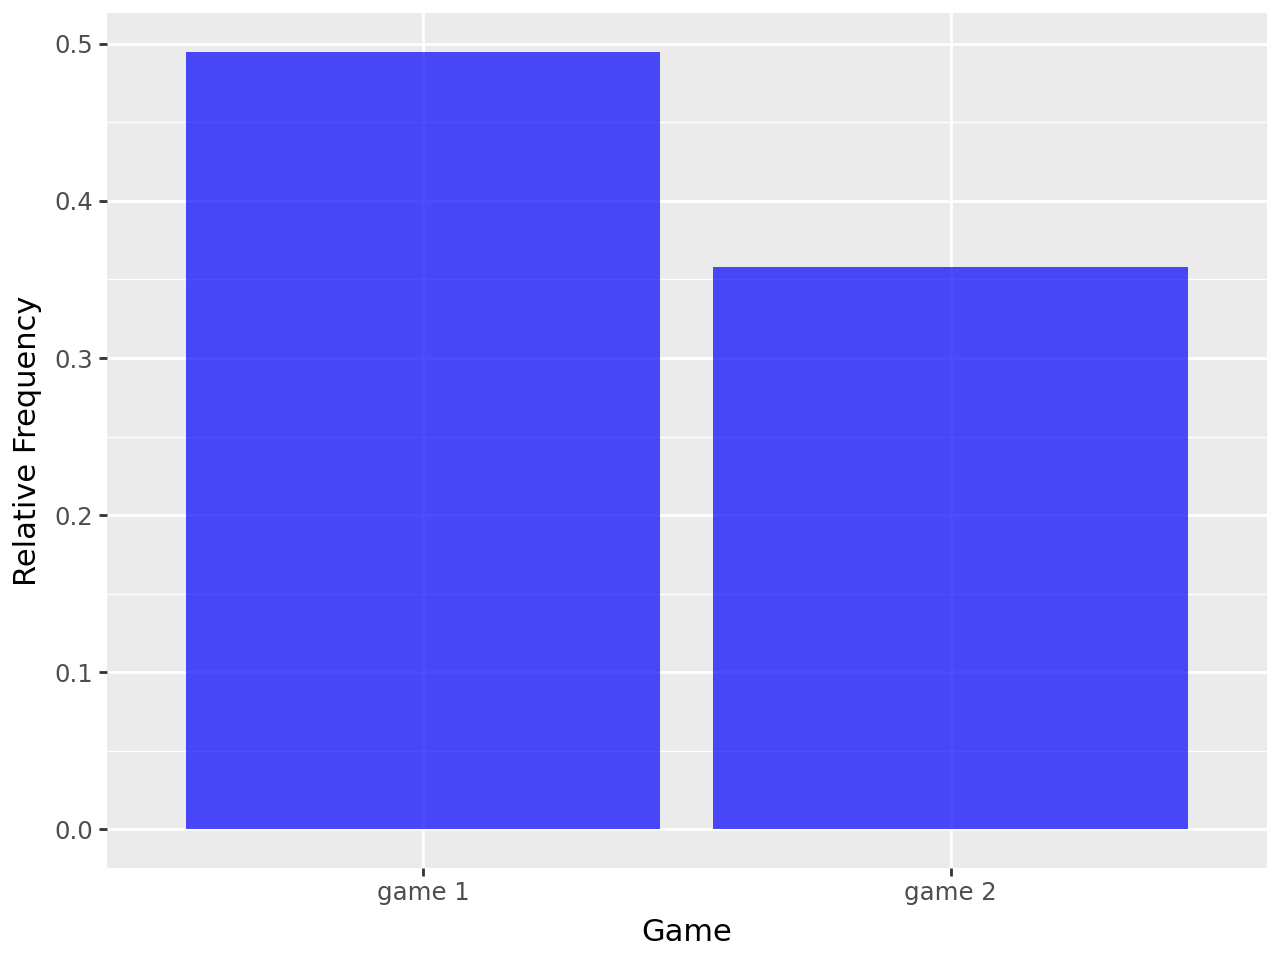

In [29]:
from plotnine import ggplot, aes, geom_bar, labs

data = {
    'Game': ['game 1', 'game 2'],
    'Relative Frequency': [relative_frequency1, relative_frequency2]
}
df = pd.DataFrame(data)

(ggplot(df)
     + aes(x='Game', y= 'Relative Frequency')
     + geom_bar(stat='identity', fill='blue', alpha=0.7)
)


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [31]:
die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die3 = Die(np.array([1, 2, 3, 4, 5, 6]))

# Print confirmation that dice are created
print("Three six-sided dice have been successfully created:")
print("Die 1 faces:", die1.get_faces())
print("Die 2 faces:", die2.get_faces())
print("Die 3 faces:", die3.get_faces())

Three six-sided dice have been successfully created:
Die 1 faces: [1 2 3 4 5 6]
Die 2 faces: [1 2 3 4 5 6]
Die 3 faces: [1 2 3 4 5 6]


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [32]:
#change die1 weight 
die1.change_weight(6,5)

print("Unfair die created with weights:")
print(die1.current_state())

Weight of 6 changed to 5
Unfair die created with weights:
1    1
2    1
3    1
4    1
5    1
6    5
dtype: int64


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [33]:
die2.change_weight(1, 5)

print("Unfair die created with weights for face 1:")
print(die3.current_state())

Weight of 1 changed to 5
Unfair die created with weights for face 1:
1    1
2    1
3    1
4    1
5    1
6    1
dtype: int64


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [41]:
fair_die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
fair_die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
fair_die3 = Die(np.array([1, 2, 3, 4, 5, 6]))
fair_die4 = Die(np.array([1, 2, 3, 4, 5, 6]))
fair_die5 = Die(np.array([1, 2, 3, 4, 5, 6]))

game1 = Game([fair_die1, fair_die2, fair_die3, fair_die4, fair_die5])

game1.play(10000)

print("Result of 10000 roll is:")
print(game1.show_results(1).head(10))

Result of 10000 roll is:
    1  2  3  4  5
1   1  2  4  4  1
2   3  1  1  2  5
3   2  4  3  5  3
4   5  6  2  5  3
5   4  6  4  3  6
6   1  2  2  1  5
7   1  1  1  2  4
8   2  5  5  2  2
9   5  4  5  3  4
10  4  6  6  1  1


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [44]:
game2 = Game([die1, die2, fair_die1, fair_die2, fair_die3])
game2.play(10000)
print("Results of 10000 rolls with 2 unfair dice and 3 fair dice:")
game2.show_results(1).head(10)

Results of 10000 rolls with 2 unfair dice and 3 fair dice:


,1,2,3,4,5
1,1,5,3,4,1
2,1,4,1,1,6
3,6,1,1,5,2
4,4,1,2,5,3
5,1,3,6,2,4
6,4,1,1,3,4
7,1,3,6,6,6
8,6,1,6,3,3
9,1,4,2,1,4
10,3,1,6,1,5


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

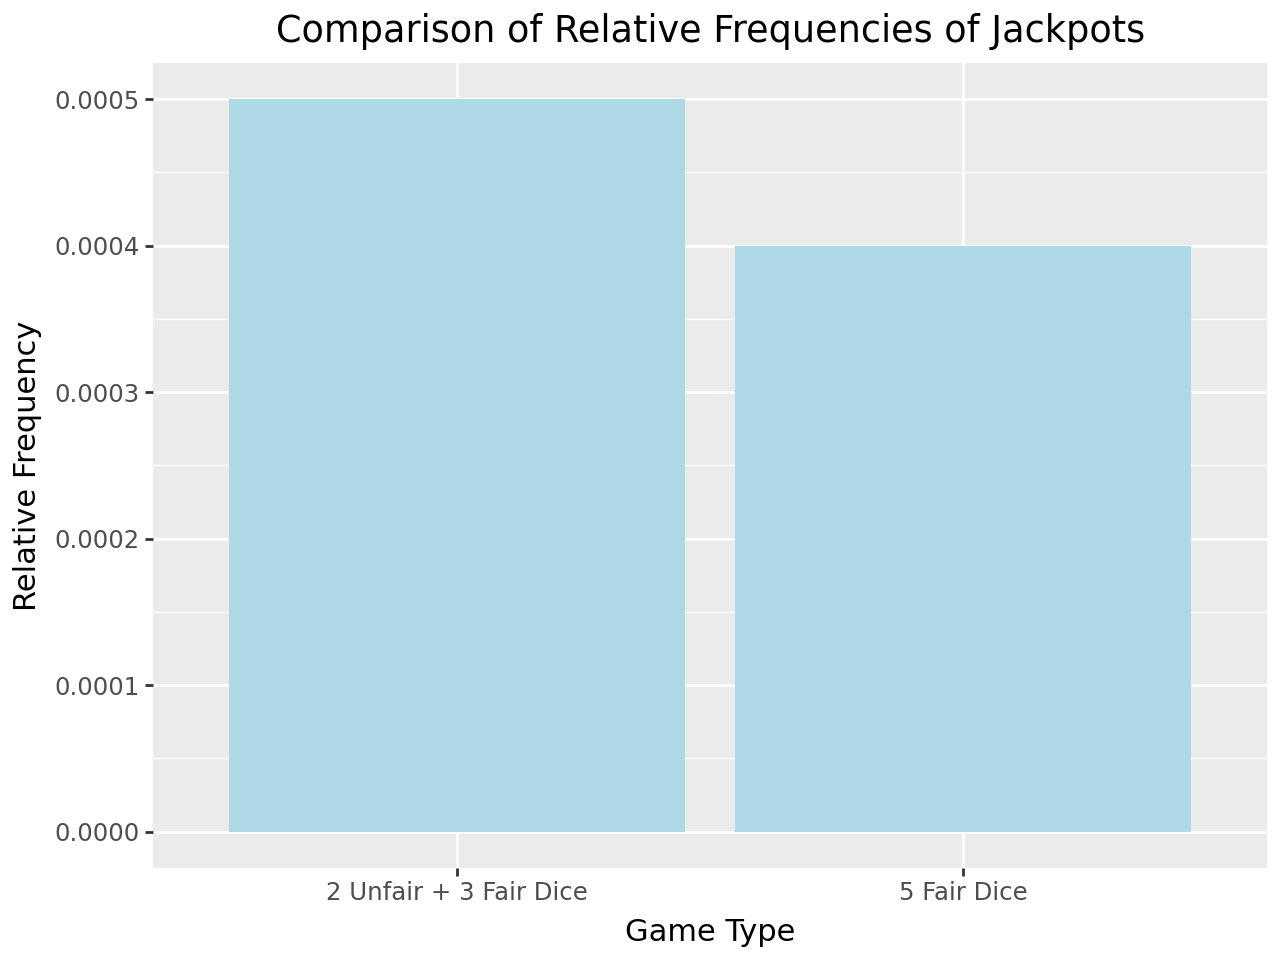

In [55]:
from plotnine import ggplot, aes, geom_bar, labs
from IPython.display import display

analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)

jackpot1 = analyzer1.jackpot()
jackpot2 = analyzer2.jackpot()


reletive_frq1 = jackpot1/10000
reletive_frq2 = jackpot2/10000

data = {
    "Game": ["5 Fair Dice", "2 Unfair + 3 Fair Dice"],
    "Relative Frequency": [reletive_frq1, reletive_frq2]
}

df = pd.DataFrame(data)

bar_chart = (
    ggplot(df, aes(x="Game", y="Relative Frequency")) +
    geom_bar(stat="identity", fill="lightblue") +
    labs(
        title="Comparison of Relative Frequencies of Jackpots",
        x="Game Type",
        y="Relative Frequency"
    )
)
display(bar_chart)

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [60]:
# Read the letter frequency file 
data = pd.read_csv('english_letters.txt', sep=r'\s+', header=None, names=['Letter', 'Frequency'])

# Extract letters and frequencies
letters = data['Letter'].tolist()
frequencies = data['Frequency'].tolist()

#create die objuct 
die = Die(np.array(letters))

# set the weights for die using weights in the file
for i in range(len(letters)):
    face = letters[i]
    weight = frequencies[i]
    die.change_weight(face, weight)

# Display the current state
print(die.current_state())


Weight of E changed to 529117365
Weight of T changed to 390965105
Weight of A changed to 374061888
Weight of O changed to 326627740
Weight of I changed to 320410057
Weight of N changed to 313720540
Weight of S changed to 294300210
Weight of R changed to 277000841
Weight of H changed to 216768975
Weight of L changed to 183996130
Weight of D changed to 169330528
Weight of C changed to 138416451
Weight of U changed to 117295780
Weight of M changed to 110504544
Weight of F changed to 95422055
Weight of G changed to 91258980
Weight of P changed to 90376747
Weight of W changed to 79843664
Weight of Y changed to 75294515
Weight of B changed to 70195826
Weight of V changed to 46337161
Weight of K changed to 35373464
Weight of J changed to 9613410
Weight of X changed to 8369915
Weight of Z changed to 4975847
Weight of Q changed to 4550166
E    529117365
T    390965105
A    374061888
O    326627740
I    320410057
N    313720540
S    294300210
R    277000841
H    216768975
L    183996130
D    169

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [64]:
die1 = Die(np.array(letters))
die2 = Die(np.array(letters))
die3 = Die(np.array(letters))
die4 = Die(np.array(letters))

for i in range(len(letters)):
    face = letters[i]
    weight = frequencies[i]
    die1.change_weight(face, weight)
    die2.change_weight(face, weight)
    die3.change_weight(face, weight)
    die4.change_weight(face, weight)

game = Game([die1, die2, die3, die4])

game.play(1000)

print(game.show_results(1).head(10))
    

Weight of E changed to 529117365
Weight of E changed to 529117365
Weight of E changed to 529117365
Weight of E changed to 529117365
Weight of T changed to 390965105
Weight of T changed to 390965105
Weight of T changed to 390965105
Weight of T changed to 390965105
Weight of A changed to 374061888
Weight of A changed to 374061888
Weight of A changed to 374061888
Weight of A changed to 374061888
Weight of O changed to 326627740
Weight of O changed to 326627740
Weight of O changed to 326627740
Weight of O changed to 326627740
Weight of I changed to 320410057
Weight of I changed to 320410057
Weight of I changed to 320410057
Weight of I changed to 320410057
Weight of N changed to 313720540
Weight of N changed to 313720540
Weight of N changed to 313720540
Weight of N changed to 313720540
Weight of S changed to 294300210
Weight of S changed to 294300210
Weight of S changed to 294300210
Weight of S changed to 294300210
Weight of R changed to 277000841
Weight of R changed to 277000841
Weight of 

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [70]:
# Load the Scrabble vocabulary
with open('scrabble_words.txt', 'r') as file:
    scrabble_words = set(word.strip().upper() for word in file.readlines())  

# Analyze the game results from the game object in Task 2
analyzer = Analyzer(game)  
permutations = analyzer.permutation_count() 

#print(permutations)  
#print(f"Sum of permutation counts: {permutations['Count'].sum()}")


# Reset index for simpler iteration
permutations_reset = permutations.reset_index()

# Initialize a counter for valid words
valid_word_count = 0

# Check which permutations are valid English words
for _, row in permutations_reset.iterrows():
    word = ''.join(row['Permutation'])  
    if word.upper() in scrabble_words:  
        valid_word_count += row['Count'] 

# Compute total and invalid word counts
total_permutations = permutations['Count'].sum()  
invalid_word_count = total_permutations - valid_word_count 

# Display results
print(f"Total permutations: {total_permutations}")
print(f"Valid English words: {valid_word_count}")
print(f"Invalid words: {invalid_word_count}")


              Count
Permutation        
(T, I, E, O)      2
(O, U, E, O)      2
(A, E, W, I)      2
(E, I, A, S)      2
(S, A, N, E)      1
...             ...
(D, I, K, E)      1
(A, O, A, A)      1
(T, O, A, S)      1
(E, T, T, T)      1
(W, T, H, O)      1

[996 rows x 1 columns]
Sum of permutation counts: 1000
Total permutations: 1000
Valid English words: 55
Invalid words: 945


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [81]:
# Load the Scrabble vocabulary
with open('scrabble_words.txt', 'r') as file:
    scrabble_words = {word.strip().upper() for word in file.readlines()}

# Create a game with 5 dice
letters = [chr(i) for i in range(ord('A'), ord('Z') + 1)]
dice = [Die(np.array(letters)) for _ in range(5)]

# Play the game
game_5_dice = Game(dice)
game_5_dice.play(1000)

# Analyze permutations
analyzer_5_dice = Analyzer(game_5_dice)
permutations_5_dice = analyzer_5_dice.permutation_count()

# Count valid Scrabble words
valid_word_count_5_dice = 0

# Check each permutation
for permutation, row in permutations_5_dice.iterrows():
    word = ''.join(permutation) 
    if word in scrabble_words:
        valid_word_count_5_dice += row['Count']

total_permutations_5_dice = permutations_5_dice['Count'].sum()
invalid_word_count_5_dice = total_permutations_5_dice - valid_word_count_5_dice

# Display results for 5 dice
print("Results for 5 Dice Game:")
print(f"Total permutations: {total_permutations_5_dice}")
print(f"Valid English words: {valid_word_count_5_dice}")
print(f"Invalid words: {invalid_word_count_5_dice}")

# Compare with the 4-dice game
if valid_word_count > valid_word_count_5_dice:
    print("4 dice produce more valid words.")
elif valid_word_count < valid_word_count_5_dice:
    print("5 dice produce more valid words.")
else:
    print("Both games produce the same number of valid words.")


Results for 5 Dice Game:
Total permutations: 1000
Valid English words: 3
Invalid words: 997
4 dice produce more valid words.
